# Starter Notebook

This notebook is aimed at helping you know how to store and analyze your data. You can either edit this notebook directly, or copy and paste from this notebook into your own. The point of this notebook is not to show you how to do your lab, but rather show you the tools you can use to record your data. 

## Recording Data

A nice way to record your data is as a pandas dataframe. This works much the same way as a numpy array, but allows you to label your rows and columns. Remember to save your notebook every time you record anything so that you don't lose any data!


In [3]:
# First we have to import pandas, numpy and matplotlib
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Storing data with named columns 
d = {'x' : [1., 2., 3., 4.], # you can name 'x' and 'y' anything
     'y' : [4., 3., 2., 1.],
     'z' : [4., 3., 2., 1.]}
df = pd.DataFrame(d)
df # the last statement in a jupyter notebook cell is what is printed

,x,y,z
0,1.0,4.0,4.0
1,2.0,3.0,3.0
2,3.0,2.0,2.0
3,4.0,1.0,1.0


In [4]:
# Storing data with named rows as well
d = {'x' : [1., 2., 3., 4.], # note that you can change the name of d to store many different datasets 
     'y' : [4., 3., 2., 1.], 
     'z' : [4., 3., 2., 1.]}

# the index=[] will contain the names of our rows
df = pd.DataFrame(d, index=["Measurement a","Measurement b","Measurement c","Measurement d"])
df

,x,y,z
Measurement a,1.0,4.0,4.0
Measurement b,2.0,3.0,3.0
Measurement c,3.0,2.0,2.0
Measurement d,4.0,1.0,1.0


In [5]:
# How to access various things in your dataframe ----------------

# If we want to access a single column, both of these syntaxes work
df['x']
df.x

Measurement a    1.0
Measurement b    2.0
Measurement c    3.0
Measurement d    4.0
Name: x, dtype: float64

In [6]:
# Select a row by its name
df.loc["Measurement b"]

x    2.0
y    3.0
z    3.0
Name: Measurement b, dtype: float64

In [7]:
# Select a single row by integer location (iloc)
df.iloc[0]

x    1.0
y    4.0
z    4.0
Name: Measurement a, dtype: float64

In [8]:
# Select rows 3-4 (remember 0-indexed!)
df[2:4]

,x,y,z
Measurement c,3.0,2.0,2.0
Measurement d,4.0,1.0,1.0


In [9]:
# Adding a new column that depends on the first two 
q = df.x*df.y
df['q'] = q # this line is what adds the new column
df

,x,y,z,q
Measurement a,1.0,4.0,4.0,4.0
Measurement b,2.0,3.0,3.0,6.0
Measurement c,3.0,2.0,2.0,6.0
Measurement d,4.0,1.0,1.0,4.0


In [10]:
# Adding a new column with your own function (for example for error calculations) --------------

def my_amazing_function(a,b):
    c = np.power(np.exp(a)*10./3*np.cos(b),2) # here is where our function goes, this is a nonsense function
    return c

def my_other_amazing_function(a,b,c):
    d = np.power(np.exp(a)*20./4*np.cos(b),2)+c # here is where our function goes, this is a nonsense function
    return d

g = my_amazing_function(df.x,df.y)
s = my_other_amazing_function(df.x, df.y, df.z)

df[r'$\gamma$'] = g # we can name the column a symbol with LaTeX style formatting if we like
df[r'$\sigma$'] = s
df

,x,y,z,q,$\gamma$,$\sigma$
Measurement a,1.0,4.0,4.0,4.0,35.077490,82.924352
Measurement b,2.0,3.0,3.0,6.0,594.564841,1340.770893
Measurement c,3.0,2.0,2.0,6.0,776.278534,1748.626702
Measurement d,4.0,1.0,1.0,4.0,9669.120838,21756.521886


In [11]:
# Delete a column
del df[r'$\sigma$']
df

,x,y,z,q,$\gamma$
Measurement a,1.0,4.0,4.0,4.0,35.077490
Measurement b,2.0,3.0,3.0,6.0,594.564841
Measurement c,3.0,2.0,2.0,6.0,776.278534
Measurement d,4.0,1.0,1.0,4.0,9669.120838


To export your final tables into your lab report you can just copy and paste from the jupyter notebook.

If you are having troubles with this during the lab time, you are also welcome to store your data in a spreadsheet and import the data as a csv later to analyse it. We really want you to do the analysis in python (not in the spreadsheet) as it is an extremely useful skill for you to learn. 

## Making Plots

Think about how you might want to present your data and the results of your analysis, sometimes a plot is a good way to do this (but not always). We expect you to think critically about how you want to display your results.

A place to look for inspiration on what types of plots you could make: https://matplotlib.org/gallery.html

The plots below are examples of how to make some basic plots.  

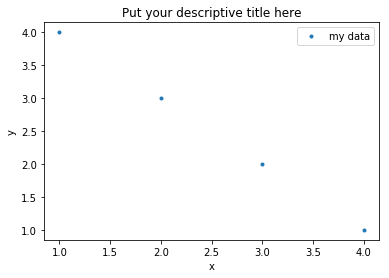

In [12]:
# Plotting x vs y
plt.plot(df.x,df.y,'.', label="my data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Put your descriptive title here")
plt.legend(loc = "upper right")
plt.savefig("my_figure_1") # this will save your figure in the same folder as your notebook 

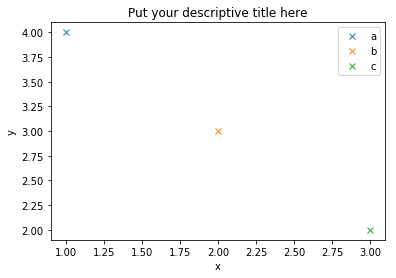

In [13]:
# A simple plot with a legend
plt.plot(df.x[0], df.y[0], 'x',  label="a")
plt.plot(df.x[1], df.y[1], 'x',  label = "b")
plt.plot(df.x[2], df.y[2], 'x',  label = "c")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Put your descriptive title here")
plt.legend(loc = "upper right")
plt.savefig("my_figure_2") # this will save your figure in the same folder as your notebook 

## Things to Google

Remember, if there is something you can't figure out how to do, Google it! If after a couple minutes for googling you are still stuck ask your TA or instructor (or a friend). 

Things to google that might be useful for this lab: 
- "error bars matplotlib"
- "trig functions numpy"
- "latex symbols math"

In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import division

# Note that 
#Hydrogen
#Uncertainty - 0.5 degree
# Recalibrated the telescope and optical stages when we took different measurements
d = {'Theta' : [17.0, 16.0, 23.0, 23.0, 15.0, 15.0, 17.5, 16.0], # note that you can change the name of d to store many different datasets 
     'Order' : [1, 1, 1, 1, 1, 1, 1, 1], 
     'Color' : ["Cyan", "Cyan", "Red", "Red", "Purple", "Purple", "Cyan", "Purple"],
     'Wavelength' : [4861.2786e-10, 4861.2786e-10, 6562.7110e-10, 6562.7110e-10, 4340.462e-10, 4340.462e-10, 4861.2786e-10, 4340.462e-10],
    }
df = pd.DataFrame(d)
df

,Color,Order,Theta,Wavelength
0,Cyan,1,17.0,4.861279e-07
1,Cyan,1,16.0,4.861279e-07
2,Red,1,23.0,6.562711e-07
3,Red,1,23.0,6.562711e-07
4,Purple,1,15.0,4.340462e-07
5,Purple,1,15.0,4.340462e-07
6,Cyan,1,17.5,4.861279e-07
7,Purple,1,16.0,4.340462e-07


In [10]:
def diffraction_distance(theta, wavelength, order):
    theta_rad = np.deg2rad((theta))
    d = np.abs((order * wavelength)/np.sin(theta_rad))
    return d

# Uncertainty for the wavelength value
def error_propagation(uncertainty, theta, wavelength, order):
    uncertainty_rad = np.deg2rad(uncertainty)
    theta_rad = np.deg2rad((theta))
    derivative = (1/np.tan(theta_rad))*(1/np.sin(theta_rad))
    error = order*wavelength*uncertainty_rad*derivative
    return error

In [11]:
diffraction= diffraction_distance(df.Theta, df.Wavelength, df.Order)
df['Diffraction_Spacing'] = diffraction
pd.options.display.float_format = '{:.2E}'.format
df

,Color,Order,Theta,Wavelength,Diffraction_Spacing
0,Cyan,1,1.70E+01,4.86E-07,1.66E-06
1,Cyan,1,1.60E+01,4.86E-07,1.76E-06
2,Red,1,2.30E+01,6.56E-07,1.68E-06
3,Red,1,2.30E+01,6.56E-07,1.68E-06
4,Purple,1,1.50E+01,4.34E-07,1.68E-06
5,Purple,1,1.50E+01,4.34E-07,1.68E-06
6,Cyan,1,1.75E+01,4.86E-07,1.62E-06
7,Purple,1,1.60E+01,4.34E-07,1.57E-06


In [40]:
propagated_error = error_propagation(0.25, df.Theta, df.Wavelength, df.Order)
df['Error +/-'] = (.001 / df.Diffraction_Spacing) * (propagated_error / df.Diffraction_Spacing)
df

,Color,Order,Theta,Wavelength,Diffraction_Spacing,Error +/-,Diffraction_Grating
0,Yellow,2,4.40E+01,5.89E-07,1.70E-06,2.66E+00,5.89E+02
1,Yellow,2,4.35E+01,5.89E-07,1.71E-06,2.69E+00,5.84E+02
2,Yellow,1,2.10E+01,5.89E-07,1.64E-06,6.91E+00,6.08E+02
3,Yellow,1,2.10E+01,5.89E-07,1.64E-06,6.91E+00,6.08E+02
4,Yellow,2,4.70E+01,5.89E-07,1.61E-06,2.52E+00,6.21E+02


In [34]:
df.style.format({
    'Theta': '{:,.1f}'.format,
    'Wavelength': '{:.2e}'.format,
    'Diffraction_Spacing': '{:.2e}'.format,
    'Error +/-': '{:.2e}'.format,
})

Diffraction_Grating = .001/df.Diffraction_Spacing
df['Diffraction_Grating'] = Diffraction_Grating 
df

,Color,Order,Theta,Wavelength,Diffraction_Spacing,Error +/-,Diffraction_Grating
0,Yellow,2,4.40E+01,5.89E-07,1.70E-06,7.67E-09,5.89E+02
1,Yellow,2,4.35E+01,5.89E-07,1.71E-06,7.87E-09,5.84E+02
2,Yellow,1,2.10E+01,5.89E-07,1.64E-06,1.87E-08,6.08E+02
3,Yellow,1,2.10E+01,5.89E-07,1.64E-06,1.87E-08,6.08E+02
4,Yellow,2,4.70E+01,5.89E-07,1.61E-06,6.56E-09,6.21E+02


In [42]:
# Round 2
#Hydrogen
#Uncertainty - 0.5 degree
# Recalibrated the telescope and optical stages when we took different measurements
d = {'Theta' : [17.0, 17.0, 15.5, 23.5, 23.5, 15.0], # note that you can change the name of d to store many different datasets 
     'Order' : [1, 1, 1, 1, 1, 1], 
     'Color' : ["Cyan", "Cyan", "Purple", "Red", "Red", "Purple"],
     'Wavelength' : [4861.2786e-10, 4861.2786e-10, 4340.462e-10, 6562.7110e-10, 6562.7110e-10, 4340.462e-10],
    }
df = pd.DataFrame(d)
df


,Color,Order,Theta,Wavelength
0,Cyan,1,1.70E+01,4.86E-07
1,Cyan,1,1.70E+01,4.86E-07
2,Purple,1,1.55E+01,4.34E-07
3,Red,1,2.35E+01,6.56E-07
4,Red,1,2.35E+01,6.56E-07
5,Purple,1,1.50E+01,4.34E-07


In [43]:
diffraction= diffraction_distance(df.Theta, df.Wavelength, df.Order)
df['Diffraction_Spacing'] = diffraction
pd.options.display.float_format = '{:.2E}'.format
df

,Color,Order,Theta,Wavelength,Diffraction_Spacing
0,Cyan,1,1.70E+01,4.86E-07,1.66E-06
1,Cyan,1,1.70E+01,4.86E-07,1.66E-06
2,Purple,1,1.55E+01,4.34E-07,1.62E-06
3,Red,1,2.35E+01,6.56E-07,1.65E-06
4,Red,1,2.35E+01,6.56E-07,1.65E-06
5,Purple,1,1.50E+01,4.34E-07,1.68E-06


In [44]:
propagated_error = error_propagation(0.25, df.Theta, df.Wavelength, df.Order)
df['Error +/-'] = (.001 / df.Diffraction_Spacing) * (propagated_error / df.Diffraction_Spacing)
df

,Color,Order,Theta,Wavelength,Diffraction_Spacing,Error +/-
0,Cyan,1,1.70E+01,4.86E-07,1.66E-06,8.58E+00
1,Cyan,1,1.70E+01,4.86E-07,1.66E-06,8.58E+00
2,Purple,1,1.55E+01,4.34E-07,1.62E-06,9.69E+00
3,Red,1,2.35E+01,6.56E-07,1.65E-06,6.10E+00
4,Red,1,2.35E+01,6.56E-07,1.65E-06,6.10E+00
5,Purple,1,1.50E+01,4.34E-07,1.68E-06,9.71E+00


In [45]:
df.style.format({
    'Theta': '{:,.1f}'.format,
    'Wavelength': '{:.2e}'.format,
    'Diffraction_Spacing': '{:.2e}'.format,
    'Error +/-': '{:.2e}'.format,
})

Diffraction_Grating = .001/df.Diffraction_Spacing
df['Diffraction_Grating'] = Diffraction_Grating 
df

,Color,Order,Theta,Wavelength,Diffraction_Spacing,Error +/-,Diffraction_Grating
0,Cyan,1,1.70E+01,4.86E-07,1.66E-06,8.58E+00,6.01E+02
1,Cyan,1,1.70E+01,4.86E-07,1.66E-06,8.58E+00,6.01E+02
2,Purple,1,1.55E+01,4.34E-07,1.62E-06,9.69E+00,6.16E+02
3,Red,1,2.35E+01,6.56E-07,1.65E-06,6.10E+00,6.08E+02
4,Red,1,2.35E+01,6.56E-07,1.65E-06,6.10E+00,6.08E+02
5,Purple,1,1.50E+01,4.34E-07,1.68E-06,9.71E+00,5.96E+02


In [46]:
# Sodium
# Average the wavelengths-argue that we don't have error from this
d = {'Theta' : [44.0, 43.5, 21, 21, 47], # note that you can change the name of d to store many different datasets 
     'Order' : [2, 2, 1, 1, 2], 
     'Color' : ["Yellow", "Yellow", "Yellow", "Yellow", "Yellow"],
     'Wavelength' : [5892.937e-10, 5892.937e-10, 5892.937e-10, 5892.937e-10, 5892.937e-10],
    }
df = pd.DataFrame(d)
df

,Color,Order,Theta,Wavelength
0,Yellow,2,4.40E+01,5.89E-07
1,Yellow,2,4.35E+01,5.89E-07
2,Yellow,1,2.10E+01,5.89E-07
3,Yellow,1,2.10E+01,5.89E-07
4,Yellow,2,4.70E+01,5.89E-07


In [47]:
diffraction= diffraction_distance(df.Theta, df.Wavelength, df.Order)
df['Diffraction_Spacing'] = diffraction
pd.options.display.float_format = '{:.2E}'.format
df

,Color,Order,Theta,Wavelength,Diffraction_Spacing
0,Yellow,2,4.40E+01,5.89E-07,1.70E-06
1,Yellow,2,4.35E+01,5.89E-07,1.71E-06
2,Yellow,1,2.10E+01,5.89E-07,1.64E-06
3,Yellow,1,2.10E+01,5.89E-07,1.64E-06
4,Yellow,2,4.70E+01,5.89E-07,1.61E-06


In [51]:
propagated_error = error_propagation(0.25, df.Theta, df.Wavelength, df.Order)
df['Error +/-'] = (.001 / df.Diffraction_Spacing) * (propagated_error / df.Diffraction_Spacing)
df

,Color,Order,Theta,Wavelength,Diffraction_Spacing,Error +/-,Diffraction_Grating
0,Yellow,2,4.40E+01,5.89E-07,1.70E-06,2.66E+00,5.89E+02
1,Yellow,2,4.35E+01,5.89E-07,1.71E-06,2.69E+00,5.84E+02
2,Yellow,1,2.10E+01,5.89E-07,1.64E-06,6.91E+00,6.08E+02
3,Yellow,1,2.10E+01,5.89E-07,1.64E-06,6.91E+00,6.08E+02
4,Yellow,2,4.70E+01,5.89E-07,1.61E-06,2.52E+00,6.21E+02


In [52]:
df.style.format({
    'Theta': '{:,.1f}'.format,
    'Wavelength': '{:.2e}'.format,
    'Diffraction_Spacing': '{:.2e}'.format,
    'Error +/-': '{:.2e}'.format,
})

Diffraction_Grating = .001/df.Diffraction_Spacing
df['Diffraction_Grating'] = Diffraction_Grating 
df

,Color,Order,Theta,Wavelength,Diffraction_Spacing,Error +/-,Diffraction_Grating
0,Yellow,2,4.40E+01,5.89E-07,1.70E-06,2.66E+00,5.89E+02
1,Yellow,2,4.35E+01,5.89E-07,1.71E-06,2.69E+00,5.84E+02
2,Yellow,1,2.10E+01,5.89E-07,1.64E-06,6.91E+00,6.08E+02
3,Yellow,1,2.10E+01,5.89E-07,1.64E-06,6.91E+00,6.08E+02
4,Yellow,2,4.70E+01,5.89E-07,1.61E-06,2.52E+00,6.21E+02
